# 3. Import the required packages with their customary aliases as follows:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [69]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


# 5.How many rows and columns are in gdp_df? What are the data types of each column?

In [71]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

There are 5 columns and 8219 rows. 

In [74]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]>

In [76]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


Country or Area = string 
Year            = integer
Value           = decimal 
Value Footnotes = decimal 

# 6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [140]:
gdp_df = gdp_df.drop(columns=["Value Footnotes"])

In [142]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [144]:
gdp_df = gdp_df.rename(columns={
    "Country or Area": "Country",
    "Value": "GDP_Per_Capita"})

In [146]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


# 7. How many countries have data for all years?

In [149]:
country_year_counts = gdp_df.groupby("Country")["Year"].count()

In [151]:
print(country_year_counts)

Country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 247, dtype: int64


In [153]:
total_years = gdp_df["Year"].nunique()
print(total_years)

34


In [155]:
countries_with_full_data = country_year_counts[country_year_counts == total_years]
print(countries_with_full_data)

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 228, dtype: int64


There are 228 countries with full data 

# Which countries are missing many years of data?

In [159]:
countries_with_missing_data = country_year_counts[country_year_counts < total_years]
print(countries_with_missing_data)

Country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: Year, dtype: int64


I would define countries missing 5 or more years of data as countries missing many years of data, so 12 countries. 

# 8. Create a histogram

In [264]:
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]["GDP_Per_Capita"].dropna()

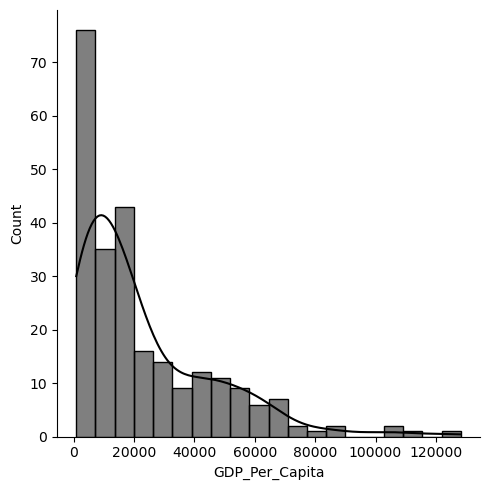

In [268]:
sns.displot(data=gdp_2020, kde=True, bins=20, color="black")

# Create a density plot 

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

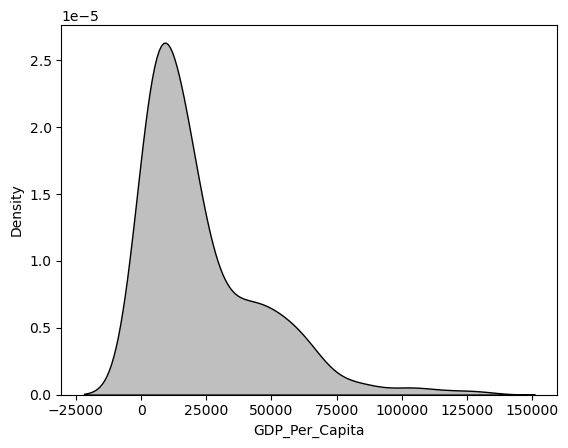

In [270]:
sns.kdeplot(gdp_2020, fill=True, color="black")

# Create a boxplot

<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

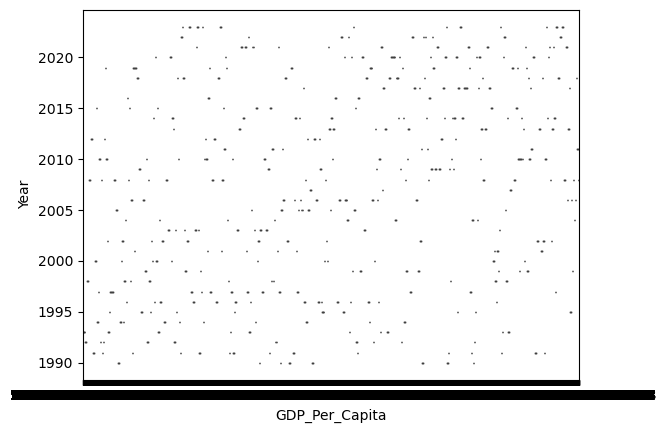

In [293]:
sns.boxplot(x="GDP_Per_Capita", y="Year", data=gdp_df)

 # Create a violin plot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

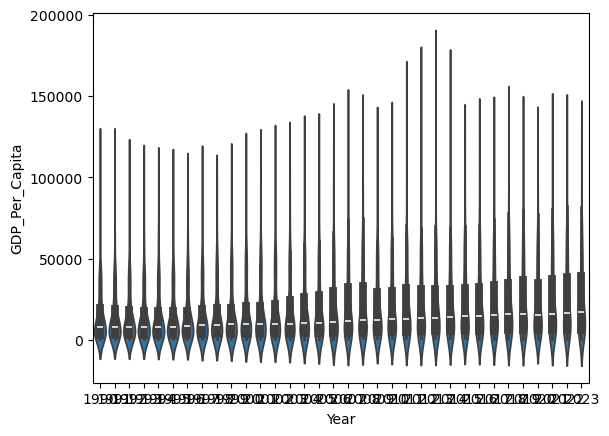

In [291]:
sns.violinplot(x="Year", y="GDP_Per_Capita", data=gdp_df)

Can't figure out the graphs, I need to find out how to select my axes better 

# 9. What was the median GDP per capita value in 2020?

In [162]:
gdp_for_2020 = gdp_df[gdp_df["Year"] == 2020]
print(gdp_for_2020)

                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
27    Africa Eastern and Southern  2020     3861.111238
61     Africa Western and Central  2020     4622.731427
95                        Albania  2020    14650.395929
129                       Algeria  2020    14194.155748
...                           ...   ...             ...
8068               Virgin Islands  2020    45055.782930
8090           West Bank and Gaza  2020     5423.682547
8120                        World  2020    18600.986362
8154                       Zambia  2020     3391.595412
8188                     Zimbabwe  2020     2987.269823

[247 rows x 3 columns]


In [164]:
median_gdp = gdp_for_2020["GDP_Per_Capita"].median
print(median_gdp)

<bound method Series.median of 3        2769.685745
27       3861.111238
61       4622.731427
95      14650.395929
129     14194.155748
            ...     
8068    45055.782930
8090     5423.682547
8120    18600.986362
8154     3391.595412
8188     2987.269823
Name: GDP_Per_Capita, Length: 247, dtype: float64>


The median is 2769.68

# 10.Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.

# 11. Which country was the first to have a GDP per capita greater than $100,000?

In [173]:
high_gdp_df = gdp_df[gdp_df["GDP_Per_Capita"] > 100000]
print(high_gdp_df)

                   Country  Year  GDP_Per_Capita
750                Bermuda  2011   101174.504104
751                Bermuda  2010   105121.639689
752                Bermuda  2009   108091.644563
753                Bermuda  2008   115015.749469
754                Bermuda  2007   117742.118950
...                    ...   ...             ...
7821  United Arab Emirates  1996   100563.698291
7822  United Arab Emirates  1995   101412.082063
7825  United Arab Emirates  1992   101100.487512
7826  United Arab Emirates  1991   103098.537132
7827  United Arab Emirates  1990   108057.042464

[106 rows x 3 columns]


In [177]:
first_high_gdp = high_gdp_df.sort_values("Year").iloc[0]
print(first_high_gdp)

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           108057.042464
Name: 7827, dtype: object


United Arab Emirates was the first country to have a GDP per capita greater than $100,000. 

# 12.Which country had the highest GDP per capita in 2020?

In [248]:
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]
print(gdp_2020)

                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
27    Africa Eastern and Southern  2020     3861.111238
61     Africa Western and Central  2020     4622.731427
95                        Albania  2020    14650.395929
129                       Algeria  2020    14194.155748
...                           ...   ...             ...
8068               Virgin Islands  2020    45055.782930
8090           West Bank and Gaza  2020     5423.682547
8120                        World  2020    18600.986362
8154                       Zambia  2020     3391.595412
8188                     Zimbabwe  2020     2987.269823

[247 rows x 3 columns]


In [187]:
highest_gdp_country = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmax()]
print(highest_gdp_country)

Country              Luxembourg
Year                       2020
GDP_Per_Capita    128256.560341
Name: 4426, dtype: object


Luxemburg had the highest GDP per capita in 2020.

# 13.Which country had the lowest GDP per capita in 2020?

In [199]:
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]
lowest_gdp_country = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmin()]
print(lowest_gdp_country)

Country              Burundi
Year                    2020
GDP_Per_Capita    833.920257
Name: 1046, dtype: object


Read in the internet use dataset into a DataFrame named internet_df. 

In [215]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=6083)

In [217]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [219]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


# 15.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [231]:
print(internet_df.columns)

Index(['Country or Area', 'Year', 'Value'], dtype='object')


In [299]:
internet_df = internet_df.rename(columns={
    "Country or Area": "Country",
    "Value": "Internet_Users"})

In [237]:
print(internet_df)

          Country  Year  Internet_Users
0     Afghanistan  2019       17.600000
1     Afghanistan  2018       16.800000
2     Afghanistan  2017       13.500000
3     Afghanistan  2016       11.000000
4     Afghanistan  2015        8.260000
...           ...   ...             ...
6078     Zimbabwe  1997        0.033080
6079     Zimbabwe  1996        0.016790
6080     Zimbabwe  1995        0.007684
6081     Zimbabwe  1994        0.001739
6082     Zimbabwe  1990        0.000000

[6083 rows x 3 columns]


# 16.Look at the number of observations in this dataset per year. What do you notice?

In [301]:
sns.barplot(x=Year.index, y=Year.values)

NameError: name 'Year' is not defined